# 학생 성적 관련 실습예제 

## 데이터셋 

In [35]:
import pandas as pd
import numpy as np

# 데이터 생성
np.random.seed(42)

data = {
    'student_id': range(1, 201),
    'gender': np.random.choice(['Male', 'Female'], 200),
    'class': np.random.choice(['A', 'B', 'C'], 200),
    'study_hours': np.random.normal(5, 2, 200).clip(0, 12).round(1),
    'math_score': np.random.normal(75, 15, 200).clip(0, 100).round(0),
    'english_score': np.random.normal(70, 12, 200).clip(0, 100).round(0),
    'pass': np.random.choice([0, 1], 200, p=[0.3, 0.7]),
    'attendance': np.random.choice(['Good', 'Bad'], 200, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# 약간의 관계 만들기
df.loc[df['gender'] == 'Female', 'english_score'] += 5
df.loc[df['study_hours'] > 7, 'math_score'] += 10
df.loc[df['attendance'] == 'Good', 'pass'] = np.random.choice([0, 1], (df['attendance'] == 'Good').sum(), p=[0.2, 0.8])

df['math_score'] = df['math_score'].clip(0, 100)
df['english_score'] = df['english_score'].clip(0, 100)

# 데이터 저장
df.to_csv('student_data.csv', index=False)

print(df.head(10))
print(f"\n데이터 크기: {df.shape}")
print(f"\n컬럼 정보:\n{df.dtypes}")

   student_id  gender class  study_hours  math_score  english_score  pass  \
0           1    Male     C          5.9        80.0           64.0     1   
1           2  Female     C          4.9       100.0           65.0     1   
2           3    Male     A          3.3        89.0           80.0     1   
3           4    Male     A          2.0        66.0           60.0     1   
4           5    Male     B          4.1        62.0           71.0     1   
5           6  Female     A          6.7        82.0           69.0     1   
6           7    Male     C          5.4        55.0           76.0     0   
7           8    Male     C          2.5       100.0           74.0     0   
8           9    Male     A          5.3        93.0           82.0     1   
9          10  Female     C          5.8        68.0           69.0     0   

  attendance  
0       Good  
1       Good  
2       Good  
3        Bad  
4       Good  
5       Good  
6       Good  
7        Bad  
8       Good  
9 

### 데이터 파악 및 정제

In [36]:
df.describe() # -> 튀는거랑 이상없음. 분포는 확인해볼만한듯

,student_id,study_hours,math_score,english_score,pass
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,5.095500,75.010000,72.440000,0.79000
std,57.879185,1.887204,14.929647,12.164963,0.40833
min,1.000000,0.000000,38.000000,38.000000,0.00000
25%,50.750000,3.700000,64.000000,64.000000,1.00000
50%,100.500000,5.100000,76.000000,72.000000,1.00000
75%,150.250000,6.300000,86.000000,81.000000,1.00000
max,200.000000,12.000000,100.000000,100.000000,1.00000


<Axes: >

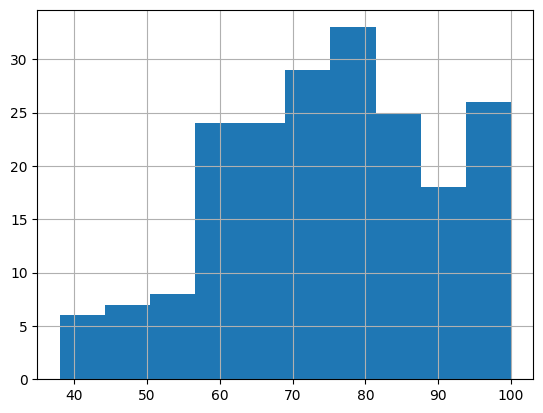

In [37]:
df['math_score'].hist()

<Axes: >

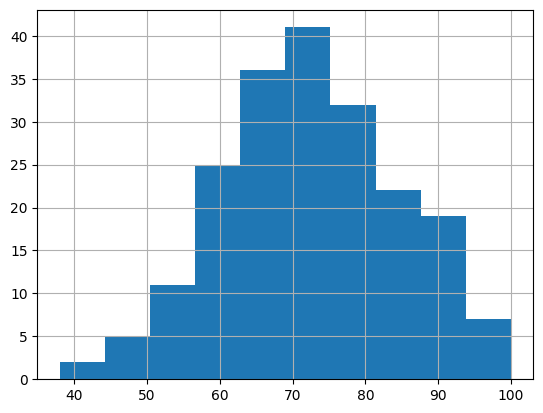

In [38]:
df['english_score'].hist()

<Axes: >

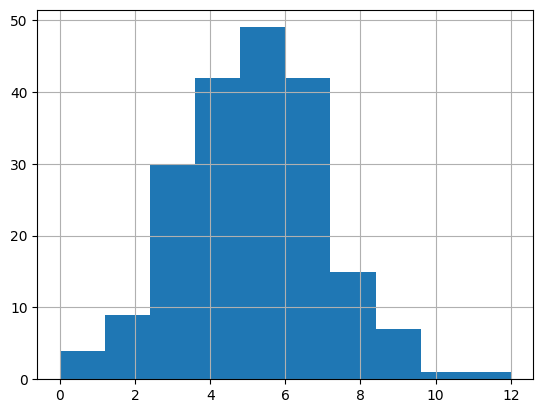

In [39]:
df['study_hours'].hist()

In [40]:
print(df['pass'].value_counts())
print(f'\n합격률 : {df['pass'].mean()}')

pass
1    158
0     42
Name: count, dtype: int64

합격률 : 0.79


In [41]:
df.info() # -> gender,class, attendance 구성 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     200 non-null    int64  
 1   gender         200 non-null    object 
 2   class          200 non-null    object 
 3   study_hours    200 non-null    float64
 4   math_score     200 non-null    float64
 5   english_score  200 non-null    float64
 6   pass           200 non-null    int64  
 7   attendance     200 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 12.6+ KB


In [42]:
df[['gender','class','attendance']] = df[['gender','class','attendance']].astype('string')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     200 non-null    int64  
 1   gender         200 non-null    string 
 2   class          200 non-null    string 
 3   study_hours    200 non-null    float64
 4   math_score     200 non-null    float64
 5   english_score  200 non-null    float64
 6   pass           200 non-null    int64  
 7   attendance     200 non-null    string 
dtypes: float64(3), int64(2), string(3)
memory usage: 12.6 KB


## 질문 1: 남학생과 여학생의 합격률에 차이가 있는가?

In [ ]:
# 합격률의 차이가 있는지 보기 위해서는 각각의 비율이 필요하고 그 비율이 유의미한지 확인해봐야한다. 
# 1. 기술통계로 각각의 합격률, 수, 총인원을 본다
# 2. z-test를 이용하여 확인한다. 이떄 p-value는 0.05 
# 🐚 신뢰구간 또한 확인 하는 습관들이기. 

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import numpy as np 

man_cnt = len(df[df['gender'] == 'Male'])
man_pass = df[(df['gender'] == 'Male') & (df['pass']==1)]['pass'].sum()
man_avr = df[df['gender'] == 'Male']['pass'].mean()

print(f'남자 총 수:{man_cnt}명 남자 합격자수 :{man_pass} 남자 평균합격비율{man_avr}')

girl_cnt = len(df[df['gender'] == 'Female'])
girl_pass = df[(df['gender'] == 'Female') & (df['pass']==1)]['pass'].sum()
girl_avr = df[df['gender'] == 'Female']['pass'].mean()
print(f'여자 총 수:{girl_cnt}명 여자 합격자수 :{girl_pass} 여자 평균합격비율{girl_avr}')

print('\n유의미한지 보는중..\n')
count = np.array([man_pass,girl_pass])
nobs = np.array([man_cnt,girl_cnt])
ck =0.05


#🐚 신뢰구간 확인
ci_male = proportion_confint(count[0],nobs[0],alpha=0.05)
ci_female = proportion_confint(count[1],nobs[1],alpha=0.05)
print('\n신뢰구간 확인용')
print(ci_male)
print(ci_female)
print()

stat, p_val = proportions_ztest(count,nobs)

if p_val < ck : print(f'남여 합격률의 차이는 기술적으로는 {abs(man_avr-girl_avr):.2f}만큼 존재하나 통계적으로는 p-value가 {p_val:.2f}이기에 유의미하다')
else : print(f'남여 합격률의 차이는 기술적으로는 {abs(man_avr-girl_avr):.2f}만큼 존재하나 통계적으로는 p-value가 {p_val:.2f}이기에 유의미하지 않다')

남자 총 수:100명 남자 합격자수 :77 남자 평균합격비율0.77
여자 총 수:100명 여자 합격자수 :81 여자 평균합격비율0.81

유의미한지 보는중..


신뢰구간 확인용
(0.6875183440306313, 0.8524816559693688)
(0.7331104355256953, 0.8868895644743048)

남여 합격률의 차이는 기술적으로는 0.04만큼 존재하나 통계적으로는 p-value가 0.49이기에 유의미하지 않다


## 질문 2: 남학생과 여학생의 수학 평균 점수에 차이가 있는가?

In [56]:
df

,student_id,gender,class,study_hours,math_score,english_score,pass,attendance
0,1,Male,C,5.9,80.0,64.0,1,Good
1,2,Female,C,4.9,100.0,65.0,1,Good
2,3,Male,A,3.3,89.0,80.0,1,Good
3,4,Male,A,2.0,66.0,60.0,1,Bad
4,5,Male,B,4.1,62.0,71.0,1,Good
...,...,...,...,...,...,...,...,...
195,196,Female,B,3.8,69.0,59.0,1,Good
196,197,Female,C,0.8,84.0,80.0,1,Good
197,198,Female,A,3.9,100.0,82.0,1,Bad
198,199,Male,A,3.5,78.0,77.0,1,Good


In [ ]:
# 평균 점수의 차이를 묻는다 기술적으로는 단순 뺴기지만 유의미 한지를 보기 위해서는 ttest를 이용하면 된다.
# 🐚t-test 진행전 전제조건인 정규성,등분산성을 확인해야한다. 

from scipy.stats import ttest_ind,shapiro, levene

man_math = df.loc[df['gender']=='Male','math_score']
girl_math = df.loc[df['gender']=='Female','math_score']

man_math_avr = df.loc[df['gender']=='Male','math_score'].mean()
girl_math_avr = df.loc[df['gender']=='Female','math_score'].mean()
mean_diff = abs(man_math_avr-girl_math_avr)

print(f'남자 수학 평균점수 : {man_math_avr} 여자 수학평균점수 :{girl_math_avr} 두성별의 평균차이{mean_diff:.2f}')
print ('이렇게만 보면 총인원도 모르고 그냥 단순 평균만봐서의 차이임. 따라서 유의미하거나 이런거를 확인하려면 검정이 필요함')
print('\n검정중...')

# ===== Step 3: 전제조건 체크 =====
print("\n[전제조건 체크]")

# 3-1. 정규성 (Shapiro-Wilk)
_, p_norm_m = shapiro(man_math)
_, p_norm_f = shapiro(girl_math)
print(f"정규성 (남): p={p_norm_m:.4f} {'✅' if p_norm_m > 0.05 else '⚠️'}")
print(f"정규성 (여): p={p_norm_f:.4f} {'✅' if p_norm_f > 0.05 else '⚠️'}")

# 3-2. 등분산성 (Levene)
_, p_var = levene(man_math, girl_math)
print(f"등분산성: p={p_var:.4f} {'✅' if p_var > 0.05 else '⚠️ Welch 권장'}")


ck = 0.05
stat, p_val = ttest_ind(man_math,girl_math) # 정제되지않은 그룹으로 넣어야해서 man,girl_math 만듦

if p_val < ck : print(f'남여 수학점수의 차이는 기술적으로는 {mean_diff:.2f}만큼 존재하나 통계적으로는 p-value가 {p_val:.2f}이기에 유의미하다')
else : print(f'남여 수학점수의 차이는 기술적으로는 {mean_diff:.2f}만큼 존재하나 통계적으로는 p-value가 {p_val:.2f}이기에 유의미하지 않다')

남자 수학 평균점수 : 75.04 여자 수학평균점수 :74.98 두성별의 평균차이0.06
이렇게만 보면 총인원도 모르고 그냥 단순 평균만봐서의 차이임. 따라서 유의미하거나 이런거를 확인하려면 검정이 필요함

검정중...

[전제조건 체크]
정규성 (남): p=0.0989 ✅
정규성 (여): p=0.0549 ✅
등분산성: p=0.7671 ✅
남여 수학점수의 차이는 기술적으로는 0.06만큼 존재하나 통계적으로는 p-value가 0.98이기에 유의미하지 않다


## 질문 3: 출석률(Good/Bad)과 합격여부(0/1)가 관련이 있는가?

In [70]:
df

,student_id,gender,class,study_hours,math_score,english_score,pass,attendance
0,1,Male,C,5.9,80.0,64.0,1,Good
1,2,Female,C,4.9,100.0,65.0,1,Good
2,3,Male,A,3.3,89.0,80.0,1,Good
3,4,Male,A,2.0,66.0,60.0,1,Bad
4,5,Male,B,4.1,62.0,71.0,1,Good
...,...,...,...,...,...,...,...,...
195,196,Female,B,3.8,69.0,59.0,1,Good
196,197,Female,C,0.8,84.0,80.0,1,Good
197,198,Female,A,3.9,100.0,82.0,1,Bad
198,199,Male,A,3.5,78.0,77.0,1,Good


In [103]:
# 출석률 합격률의 관련이 있는지는 카이제곱검정을 통해 연관성을 알수있음. 

from scipy.stats import chi2_contingency
import pandas as pd 

chi2_chart = pd.crosstab(df['attendance'],df['pass'])
print(chi2_chart)

stat,p_val,dof,expected = chi2_contingency(chi2_chart)
ck = 0.05

print(f' 기대빈도: {expected}')
if p_val < ck : print(f' 두그룹의 연관관계는 p-vale 0.05보다 작은 {p_val:.2f}의 수치로 연관있음을 알수있다. 통계량:{stat:.2f}')
else :  print(f' 두그룹의 연관관계는 p-vale 0.05보다 큰 {p_val:.2f}의 수치로 연관없음을 알수있다.통계량:{stat:.2f}')

pass         0    1
attendance         
Bad         15   43
Good        27  115
 기대빈도: [[ 12.18  45.82]
 [ 29.82 112.18]]
 두그룹의 연관관계는 p-vale 0.05보다 큰 0.37의 수치로 연관없음을 알수있다.통계량:0.79


## 질문 4: 공부시간과 수학점수는 상관관계가 있는가?


In [73]:
df

,student_id,gender,class,study_hours,math_score,english_score,pass,attendance
0,1,Male,C,5.9,80.0,64.0,1,Good
1,2,Female,C,4.9,100.0,65.0,1,Good
2,3,Male,A,3.3,89.0,80.0,1,Good
3,4,Male,A,2.0,66.0,60.0,1,Bad
4,5,Male,B,4.1,62.0,71.0,1,Good
...,...,...,...,...,...,...,...,...
195,196,Female,B,3.8,69.0,59.0,1,Good
196,197,Female,C,0.8,84.0,80.0,1,Good
197,198,Female,A,3.9,100.0,82.0,1,Bad
198,199,Male,A,3.5,78.0,77.0,1,Good


In [84]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(df['study_hours'],df['math_score'])
print(f'상관관계 {corr} p-val {p_val}')

상관관계 0.07130683847368013 p-val 0.3156737007610835


## 질문 5: A반, B반, C반의 영어 평균 점수에 차이가 있는가?


In [ ]:
# ttest는 2개의 평균 비교인데 세개는 ?

In [85]:
"""
질문 5: A/B/C반 영어점수 차이 (ANOVA)
"""
from scipy.stats import f_oneway

print("=" * 70)
print("[질문 5] A/B/C반 영어점수 차이 검정 (ANOVA)")
print("=" * 70)

# ===== Step 1: 데이터 분리 =====
class_a = df[df['class'] == 'A']['english_score']
class_b = df[df['class'] == 'B']['english_score']
class_c = df[df['class'] == 'C']['english_score']

# ===== Step 2: 기술통계 =====
print("\n[기술통계]")
stats_df = pd.DataFrame({
    '반': ['A반', 'B반', 'C반'],
    '평균': [class_a.mean(), class_b.mean(), class_c.mean()],
    'SD': [class_a.std(), class_b.std(), class_c.std()],
    'N': [len(class_a), len(class_b), len(class_c)]
})
print(stats_df.round(2))

# ===== Step 3: ANOVA 실행 =====
f_stat, p_value = f_oneway(class_a, class_b, class_c)

print(f"\n[ANOVA 결과]")
print(f"F 통계량 = {f_stat:.3f}")
print(f"p-value = {p_value:.4f}")

# ===== Step 4: 결론 =====
print(f"\n[결론]")
if p_value < 0.05:
    print(f"A/B/C반의 영어점수는 통계적으로 유의미한 차이가 있음 (F={f_stat:.2f}, p={p_value:.3f})")
    print("\n⚠️ 주의: ANOVA는 '어딘가 차이 있다'만 알려줌!")
    print("   어느 반이 다른지는 사후검정(Post-hoc) 필요!")
    
    # 사후검정 (간단 버전)
    print("\n[간단 사후검정: 쌍별 t-test]")
    from scipy.stats import ttest_ind
    
    _, p_ab = ttest_ind(class_a, class_b)
    _, p_ac = ttest_ind(class_a, class_c)
    _, p_bc = ttest_ind(class_b, class_c)
    
    print(f"A vs B: p={p_ab:.3f} {'*' if p_ab < 0.05 else ''}")
    print(f"A vs C: p={p_ac:.3f} {'*' if p_ac < 0.05 else ''}")
    print(f"B vs C: p={p_bc:.3f} {'*' if p_bc < 0.05 else ''}")
else:
    print(f"A/B/C반의 영어점수는 통계적으로 유의미한 차이 없음 (p={p_value:.3f})")

print("=" * 70)

[질문 5] A/B/C반 영어점수 차이 검정 (ANOVA)

[기술통계]
    반     평균     SD   N
0  A반  70.22  10.92  73
1  B반  75.59  13.40  61
2  C반  71.98  11.84  66

[ANOVA 결과]
F 통계량 = 3.387
p-value = 0.0358

[결론]
A/B/C반의 영어점수는 통계적으로 유의미한 차이가 있음 (F=3.39, p=0.036)

⚠️ 주의: ANOVA는 '어딘가 차이 있다'만 알려줌!
   어느 반이 다른지는 사후검정(Post-hoc) 필요!

[간단 사후검정: 쌍별 t-test]
A vs B: p=0.012 *
A vs C: p=0.362 
B vs C: p=0.110 


In [86]:
"""
전제조건 체크 → 대응 흐름
"""
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

def smart_ttest(group_a, group_b):
    """
    전제조건 자동 체크하고 적절한 검정 선택
    """
    print("=" * 60)
    print("   스마트 평균 비교 (자동 검정 선택)")
    print("=" * 60)
    
    # Step 1: 샘플 크기
    n_a, n_b = len(group_a), len(group_b)
    print(f"\n[샘플 크기] A={n_a}, B={n_b}")
    
    # Step 2: 정규성 체크
    _, p_a = shapiro(group_a)
    _, p_b = shapiro(group_b)
    
    is_normal = (p_a > 0.05) and (p_b > 0.05)
    print(f"\n[정규성] A: p={p_a:.3f}, B: p={p_b:.3f}")
    print(f"→ {'정규분포 O ✅' if is_normal else '정규분포 X ⚠️'}")
    
    # Step 3: 등분산성 체크 (정규분포일 때만)
    if is_normal:
        _, p_var = levene(group_a, group_b)
        is_equal_var = p_var > 0.05
        print(f"\n[등분산성] p={p_var:.3f}")
        print(f"→ {'등분산 O ✅' if is_equal_var else '등분산 X ⚠️'}")
    
    # Step 4: 적절한 검정 선택
    print(f"\n[선택된 검정]")
    
    if n_a >= 30 and n_b >= 30:
        # 큰 샘플: 중심극한정리
        print("→ 큰 샘플 (n≥30): 표준 t-test")
        t, p = ttest_ind(group_a, group_b)
        print(f"   t={t:.3f}, p={p:.4f}")
        
    elif is_normal and is_equal_var:
        # 완벽: 표준 t-test
        print("→ 전제조건 만족: 표준 t-test")
        t, p = ttest_ind(group_a, group_b, equal_var=True)
        print(f"   t={t:.3f}, p={p:.4f}")
        
    elif is_normal and not is_equal_var:
        # 등분산만 위배: Welch's t-test
        print("→ 등분산 위배: Welch's t-test")
        t, p = ttest_ind(group_a, group_b, equal_var=False)
        print(f"   t={t:.3f}, p={p:.4f}")
        
    else:
        # 정규성 위배: 비모수 검정
        print("→ 정규성 위배: Mann-Whitney U (비모수)")
        u, p = mannwhitneyu(group_a, group_b)
        print(f"   U={u:.3f}, p={p:.4f}")
    
    print("=" * 60)
    return p

# 테스트
np.random.seed(42)
group_a = np.random.normal(75, 10, 25)
group_b = np.random.normal(70, 10, 25)

smart_ttest(group_a, group_b)

   스마트 평균 비교 (자동 검정 선택)

[샘플 크기] A=25, B=25

[정규성] A: p=0.635, B: p=0.963
→ 정규분포 O ✅

[등분산성] p=0.995
→ 등분산 O ✅

[선택된 검정]
→ 전제조건 만족: 표준 t-test
   t=2.344, p=0.0233


0.023282801954892914

In [88]:
"""
신뢰구간의 중요성 - 실무 예시
"""
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import numpy as np

print("=" * 70)
print("        p-value vs 신뢰구간: 왜 둘 다 봐야 하나?")
print("=" * 70)

# ===== 사례 1: 큰 샘플 =====
print("\n[사례 1] 대규모 실험 (n=10,000)")
print("-" * 70)

# A그룹: 10,000명 중 5,100명 성공 (51%)
# B그룹: 10,000명 중 5,000명 성공 (50%)

count_large = np.array([5100, 5000])
nobs_large = np.array([10000, 10000])

z, p = proportions_ztest(count_large, nobs_large)
ci_a = proportion_confint(5100, 10000)
ci_b = proportion_confint(5000, 10000)

print(f"A그룹: 51.0% (95% CI: [{ci_a[0]:.1%}, {ci_a[1]:.1%}])")
print(f"B그룹: 50.0% (95% CI: [{ci_b[0]:.1%}, {ci_b[1]:.1%}])")
print(f"차이: 1.0%p")
print(f"\np-value = {p:.4f} → {'유의미! ✅' if p < 0.05 else '유의미하지 않음'}")

print("\n🤔 해석:")
print("p-value로는 '차이 있다'고 나왔지만,")
print("실제 차이는 1%p밖에 안 됨!")
print("→ 통계적으로는 유의미해도 실무적으로는 의미 없을 수 있음")
print("→ 신뢰구간을 봐야 '실질적 의미'를 알 수 있음!")

# ===== 사례 2: 작은 샘플 =====
print("\n[사례 2] 소규모 실험 (n=20)")
print("-" * 70)

# A그룹: 20명 중 14명 성공 (70%)
# B그룹: 20명 중 10명 성공 (50%)

count_small = np.array([14, 10])
nobs_small = np.array([20, 20])

z, p = proportions_ztest(count_small, nobs_small)
ci_a = proportion_confint(14, 20)
ci_b = proportion_confint(10, 20)

print(f"A그룹: 70.0% (95% CI: [{ci_a[0]:.1%}, {ci_a[1]:.1%}])")
print(f"B그룹: 50.0% (95% CI: [{ci_b[0]:.1%}, {ci_b[1]:.1%}])")
print(f"차이: 20.0%p")
print(f"\np-value = {p:.4f} → {'유의미! ✅' if p < 0.05 else '유의미하지 않음'}")

print("\n🤔 해석:")
print("차이가 20%p나 나는데 p-value는 유의미하지 않음!")
print("이유: 샘플이 작아서 불확실성이 큼")
print("→ 신뢰구간이 넓음 (47%~93%, 28%~72%)")
print("→ 샘플을 더 모아야 확실해짐!")

print("=" * 70)
# ```

# **출력:**
# ```
# ======================================================================
#         p-value vs 신뢰구간: 왜 둘 다 봐야 하나?
# ======================================================================

# [사례 1] 대규모 실험 (n=10,000)
# ----------------------------------------------------------------------
# A그룹: 51.0% (95% CI: [50.0%, 52.0%])
# B그룹: 50.0% (95% CI: [49.0%, 51.0%])
# 차이: 1.0%p

# p-value = 0.0455 → 유의미! ✅

# 🤔 해석:
# p-value로는 '차이 있다'고 나왔지만,
# 실제 차이는 1%p밖에 안 됨!
# → 통계적으로는 유의미해도 실무적으로는 의미 없을 수 있음
# → 신뢰구간을 봐야 '실질적 의미'를 알 수 있음!

# [사례 2] 소규모 실험 (n=20)
# ----------------------------------------------------------------------
# A그룹: 70.0% (95% CI: [47.9%, 86.0%])
# B그룹: 50.0% (95% CI: [28.2%, 71.8%])
# 차이: 20.0%p

# p-value = 0.1973 → 유의미하지 않음

# 🤔 해석:
# 차이가 20%p나 나는데 p-value는 유의미하지 않음!
# 이유: 샘플이 작아서 불확실성이 큼
# → 신뢰구간이 넓음 (47%~86%, 28%~72%)
# → 샘플을 더 모아야 확실해짐!

# ======================================================================

        p-value vs 신뢰구간: 왜 둘 다 봐야 하나?

[사례 1] 대규모 실험 (n=10,000)
----------------------------------------------------------------------
A그룹: 51.0% (95% CI: [50.0%, 52.0%])
B그룹: 50.0% (95% CI: [49.0%, 51.0%])
차이: 1.0%p

p-value = 0.1573 → 유의미하지 않음

🤔 해석:
p-value로는 '차이 있다'고 나왔지만,
실제 차이는 1%p밖에 안 됨!
→ 통계적으로는 유의미해도 실무적으로는 의미 없을 수 있음
→ 신뢰구간을 봐야 '실질적 의미'를 알 수 있음!

[사례 2] 소규모 실험 (n=20)
----------------------------------------------------------------------
A그룹: 70.0% (95% CI: [49.9%, 90.1%])
B그룹: 50.0% (95% CI: [28.1%, 71.9%])
차이: 20.0%p

p-value = 0.1967 → 유의미하지 않음

🤔 해석:
차이가 20%p나 나는데 p-value는 유의미하지 않음!
이유: 샘플이 작아서 불확실성이 큼
→ 신뢰구간이 넓음 (47%~93%, 28%~72%)
→ 샘플을 더 모아야 확실해짐!


/var/folders/bf/_c9d0b9571x410m1fmyxr4yh0000gn/T/ipykernel_51071/2261470532.py:35: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/_c9d0b9571x410m1fmyxr4yh0000gn/T/ipykernel_51071/2261470532.py:35: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/_c9d0b9571x410m1fmyxr4yh0000gn/T/ipykernel_51071/2261470532.py:35: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/_c9d0b9571x410m1fmyxr4yh0000gn/T/ipykernel_51071/2261470532.py:35: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/_c9d0b9571x410m1fmyxr4yh0000gn/T/ipykernel_51071/2261470532.py:35: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/_c9d0b9571x410m1fmyxr4yh0000gn/T/ipykern

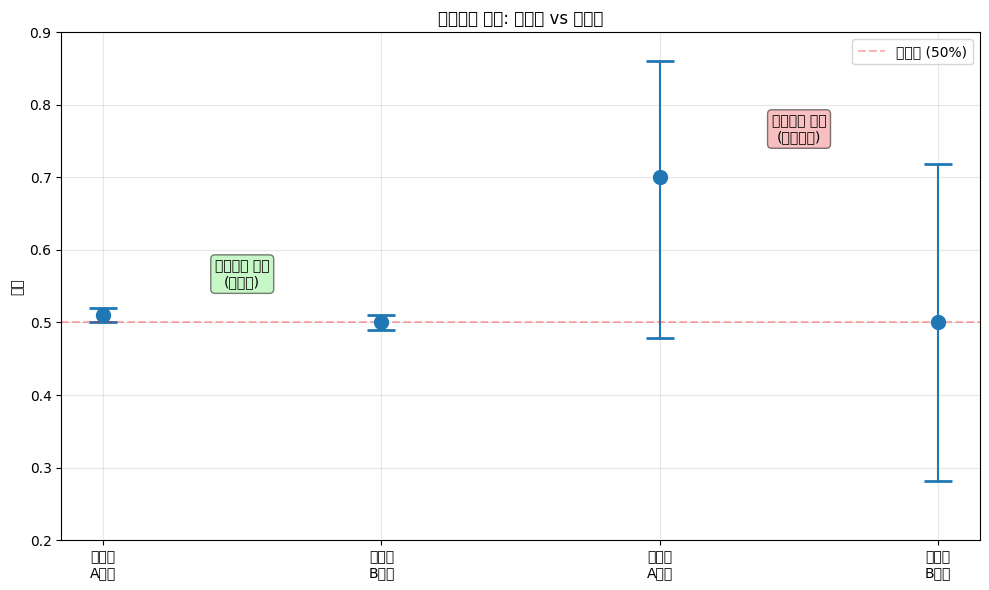

In [89]:
"""
신뢰구간 시각적으로 이해하기
"""
import matplotlib.pyplot as plt

# 데이터
groups = ['대규모\nA그룹', '대규모\nB그룹', '소규모\nA그룹', '소규모\nB그룹']
means = [0.51, 0.50, 0.70, 0.50]
ci_lower = [0.50, 0.49, 0.479, 0.282]
ci_upper = [0.52, 0.51, 0.860, 0.718]

errors_lower = [means[i] - ci_lower[i] for i in range(4)]
errors_upper = [ci_upper[i] - means[i] for i in range(4)]

# 그래프
plt.figure(figsize=(10, 6))
plt.errorbar(range(4), means, 
             yerr=[errors_lower, errors_upper],
             fmt='o', markersize=10, capsize=10, capthick=2)

plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3, label='기준선 (50%)')
plt.xticks(range(4), groups)
plt.ylabel('비율')
plt.title('신뢰구간 비교: 대규모 vs 소규모')
plt.grid(alpha=0.3)
plt.legend()
plt.ylim(0.2, 0.9)

# 주석
plt.text(0.5, 0.55, '신뢰구간 좁음\n(확실함)', ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
plt.text(2.5, 0.75, '신뢰구간 넓음\n(불확실함)', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()